In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
img_size = 224
batch_size = 32
data_path = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\ct"  # unzipped folder
train_path = os.path.join(data_path, r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\ct\Training")
test_path = os.path.join(data_path, r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\ct\Testing")


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [5]:
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
179/179 [==============================] - 47436s 266s/step - loss: 0.4144 - accuracy: 0.8559 - val_loss: 1.4460 - val_accuracy: 0.2288
Epoch 2/10
179/179 [==============================] - 2345s 13s/step - loss: 0.1575 - accuracy: 0.9433 - val_loss: 1.3597 - val_accuracy: 0.2944
Epoch 3/10
179/179 [==============================] - 1600s 9s/step - loss: 0.1068 - accuracy: 0.9636 - val_loss: 1.8548 - val_accuracy: 0.3089
Epoch 4/10
179/179 [==============================] - 1974s 11s/step - loss: 0.0891 - accuracy: 0.9697 - val_loss: 2.4248 - val_accuracy: 0.3066
Epoch 5/10
179/179 [==============================] - 1274s 7s/step - loss: 0.0568 - accuracy: 0.9818 - val_loss: 2.2242 - val_accuracy: 0.3074
Epoch 6/10
179/179 [==============================] - 1329s 7s/step - loss: 0.0508 - accuracy: 0.9820 - val_loss: 1.5419 - val_accuracy: 0.3890
Epoch 7/10
179/179 [==============================] - 1274s 7s/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 2812.7256 - val_a

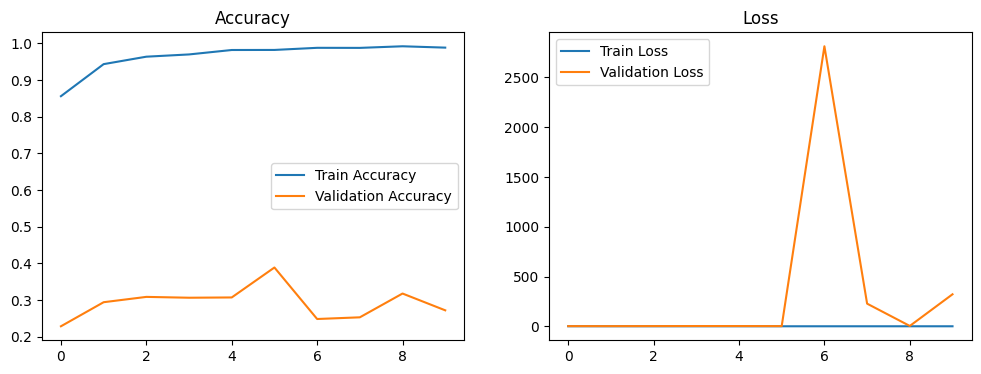

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

41/41 [==============================] - 66s 2s/step


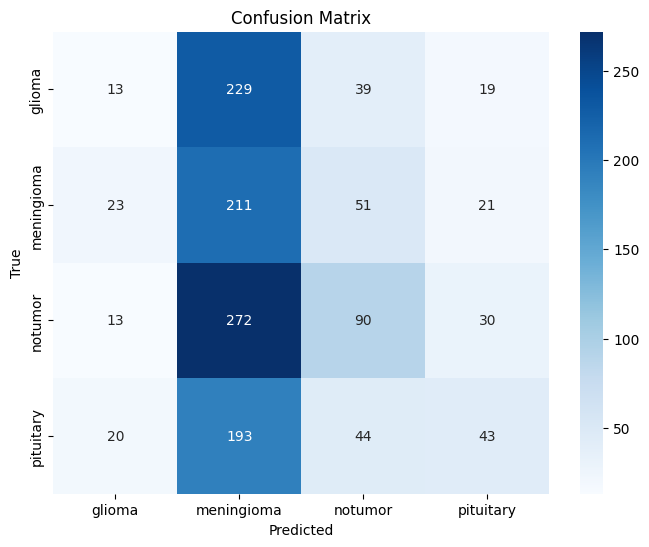

Classification Report:

              precision    recall  f1-score   support

      glioma       0.19      0.04      0.07       300
  meningioma       0.23      0.69      0.35       306
     notumor       0.40      0.22      0.29       405
   pituitary       0.38      0.14      0.21       300

    accuracy                           0.27      1311
   macro avg       0.30      0.27      0.23      1311
weighted avg       0.31      0.27      0.23      1311



In [8]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

In [16]:
print("Class indices (train):", train_generator.class_indices)


Class indices (train): {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Invert class mapping
label_map = train_generator.class_indices
inv_label_map = {v: k for k, v in label_map.items()}

def predict_image(img_path):
    # Load and preprocess
    img = load_img(img_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction[0])
    predicted_label = inv_label_map[predicted_class_idx]
    confidence = prediction[0][predicted_class_idx] * 100

    # Show
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print result
    print(f"\n🧠 Predicted Label: {predicted_label}")
    print(f"🔢 Confidence: {confidence:.2f}%")


1/1 [==============================] - 0s 142ms/step


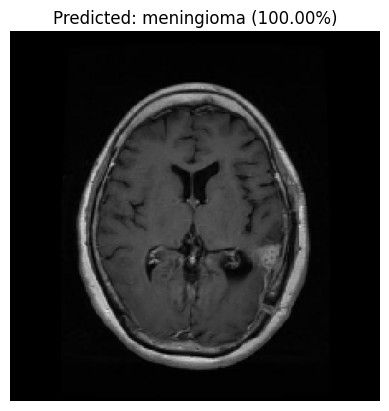


🧠 Predicted Label: meningioma
🔢 Confidence: 100.00%


In [19]:
predict_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\ct\Testing\glioma\Te-gl_0019.jpg")
